<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Делаем-фундаментальные-заявления" data-toc-modified-id="Делаем-фундаментальные-заявления-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Делаем фундаментальные заявления</a></span></li><li><span><a href="#Загружаем-данные" data-toc-modified-id="Загружаем-данные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загружаем данные</a></span></li><li><span><a href="#Смотрим-прицениваемся" data-toc-modified-id="Смотрим-прицениваемся-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Смотрим-прицениваемся</a></span></li><li><span><a href="#Делаем-выводы" data-toc-modified-id="Делаем-выводы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Делаем выводы</a></span></li><li><span><a href="#Работаем-ножницами" data-toc-modified-id="Работаем-ножницами-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Работаем ножницами</a></span><ul class="toc-item"><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Год-регистрации-авто" data-toc-modified-id="Год-регистрации-авто-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Год регистрации авто</a></span></li><li><span><a href="#Мощность-авто" data-toc-modified-id="Мощность-авто-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>Мощность авто</a></span></li><li><span><a href="#Цена-авто" data-toc-modified-id="Цена-авто-1.5.5"><span class="toc-item-num">1.5.5&nbsp;&nbsp;</span>Цена авто</a></span></li></ul></li><li><span><a href="#Что-там-с-корреляцией?" data-toc-modified-id="Что-там-с-корреляцией?-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Что там с корреляцией?</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>RandomForest</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

### Делаем фундаментальные заявления

In [1]:
# импорт магии
import lightgbm as lgb
import numpy    as np
import pandas   as pd
import seaborn  as sns

from catboost                import CatBoostRegressor
from catboost                import cv, Pool

from sklearn.ensemble        import RandomForestRegressor
from sklearn.metrics         import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import OrdinalEncoder
from sklearn.preprocessing   import StandardScaler

### Загружаем данные

In [2]:
df = pd.read_csv('')

### Смотрим-прицениваемся

In [3]:
def exploring(df):
    print ('------------- Краткая информация ------------')
    display(df.head())
    display(df.info())
    display(df.describe())
    display('Пропуски: ', df.isna().mean())
    print('Количество строк-дубликатов:', df.duplicated().sum())
    
exploring(df)

------------- Краткая информация ------------


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


'Пропуски: '

DateCrawled          0.000000
Price                0.000000
VehicleType          0.105794
RegistrationYear     0.000000
Gearbox              0.055967
Power                0.000000
Model                0.055606
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.092827
Brand                0.000000
NotRepaired          0.200791
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

Количество строк-дубликатов: 4


### Делаем выводы
Кажется, нам придется кромсать датасет:
* есть 4 ничтожных дубликата. Кажется, кто-то добавлял объявления не один раз;
* значительное количество пропусков в `NotRepaired` и `VehicleType`;
* неадекватные данные с годами регистрации авто и мощностью двигателя;
* бесценные автомобили (с ценой 0 Евро);
* отсутствие объявлений с фотографиями.

### Работаем ножницами 

#### Дубликаты
Удаляем!

In [4]:
df = df.drop_duplicates()
df.shape[0]

354365

#### Пропуски
Удаляем, т.к. они не помогут нам в определении рыночной стоимости

In [5]:
df = df.dropna()
df.shape[0]

245810

#### Год регистрации авто
Посмотрим максимальную дату активности пользователя. Год в ней будем считать максимальным для регистрации авто.

In [6]:
df.LastSeen.max()

'2016-04-07 14:58:51'

Теперь попробуем определить нижнюю границу лет. Сначала посмотрим до 1900

In [7]:
print(df[df['RegistrationYear'] < 1900].shape[0])

0


Не было тогда ни Опеля, ни БМВ, ни Вольксвагена. Этот период смело отправляем в мусорку.

Кстати, тут иногда в марках попадается `sonstige_autos`, что в переводе с немецкого - `другие_авто`. От них мы тоже избавимся.

In [8]:
print(df.query('1900 < RegistrationYear < 1950').shape[0])
df.query('1900 < RegistrationYear < 1950').sample(10)

24


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
306463,2016-03-29 03:36:23,16800,other,1930,manual,24,other,150000,1,petrol,ford,no,2016-03-29 00:00:00,0,51063,2016-04-05 17:25:58
270911,2016-03-23 11:48:08,0,other,1910,manual,0,other,5000,0,petrol,citroen,no,2016-03-23 00:00:00,0,98630,2016-03-23 11:48:08
1928,2016-03-25 15:58:21,7000,suv,1945,manual,48,other,150000,2,petrol,volkswagen,no,2016-03-25 00:00:00,0,58135,2016-03-25 15:58:21
324049,2016-03-16 17:57:29,8750,convertible,1923,manual,8,c3,5000,1,petrol,citroen,no,2016-03-16 00:00:00,0,27299,2016-04-04 22:16:07
197739,2016-04-01 09:39:11,0,other,1919,manual,0,other,150000,6,petrol,ford,yes,2016-04-01 00:00:00,0,23863,2016-04-01 09:39:11
230095,2016-03-09 16:52:31,11500,convertible,1929,manual,15,other,5000,1,petrol,bmw,yes,2016-03-09 00:00:00,0,70569,2016-04-07 06:44:38
74942,2016-03-22 14:48:22,12000,suv,1945,manual,45,other,50000,2,petrol,volkswagen,no,2016-03-22 00:00:00,0,51065,2016-03-22 14:48:22
33638,2016-03-16 09:47:50,5400,small,1937,manual,0,other,20000,3,petrol,opel,no,2016-03-16 00:00:00,0,7907,2016-03-17 07:47:51
68185,2016-03-25 14:48:15,19900,convertible,1932,manual,18,other,5000,2,petrol,bmw,no,2016-03-25 00:00:00,0,99735,2016-04-06 18:15:26
230679,2016-04-01 12:37:37,7500,suv,1942,manual,72,other,100000,2,gasoline,jeep,no,2016-04-01 00:00:00,0,63925,2016-04-05 06:17:31


Думаю, достаточно! Закрепим!

In [9]:
df = df.query('1970 < RegistrationYear < 2017 and Brand != "sonstige_autos"')
df.shape[0]

245264

#### Мощность авто
Дальше узнаем что там с мощностью. Посмотрим что там вообще за машины с мощностью больше 800 л.с. Это нижняя планка для суперкаров из этой статьи https://en.wikipedia.org/wiki/List_of_production_cars_by_power_output

In [10]:
print(df[df['Power'] > 800].shape[0])
df[df['Power'] > 800].sample(10)

139


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
196532,2016-03-20 16:51:48,6000,wagon,2004,auto,17700,5er,150000,7,gasoline,bmw,no,2016-03-20 00:00:00,0,26316,2016-04-06 22:45:56
205808,2016-03-12 16:40:34,3150,coupe,2007,manual,15033,other,5000,3,gasoline,alfa_romeo,no,2016-03-12 00:00:00,0,35716,2016-03-17 18:47:28
9875,2016-03-31 20:51:13,550,wagon,2003,manual,1753,focus,150000,1,gasoline,ford,yes,2016-03-31 00:00:00,0,21039,2016-03-31 20:51:13
193012,2016-03-20 17:48:56,825,sedan,1985,manual,909,80,150000,7,petrol,audi,yes,2016-03-20 00:00:00,0,91460,2016-04-07 00:45:55
62671,2016-03-29 09:36:56,800,wagon,2002,manual,1780,berlingo,150000,6,petrol,citroen,no,2016-03-29 00:00:00,0,47228,2016-03-31 09:55:12
308234,2016-03-28 22:49:54,3300,sedan,2001,auto,1933,5er,150000,2,gasoline,bmw,no,2016-03-28 00:00:00,0,45468,2016-04-07 06:16:37
128862,2016-03-17 19:57:58,1450,coupe,2002,manual,1900,stilo,150000,7,gasoline,fiat,no,2016-03-17 00:00:00,0,59229,2016-04-07 09:15:49
240661,2016-03-17 13:53:42,700,small,1996,manual,1275,micra,80000,5,petrol,nissan,no,2016-03-17 00:00:00,0,46446,2016-03-17 14:41:33
167351,2016-04-03 18:47:14,4700,small,2009,manual,6045,polo,125000,12,petrol,volkswagen,no,2016-04-03 00:00:00,0,48565,2016-04-05 19:17:39
113184,2016-03-12 09:58:46,350,small,1995,manual,5575,polo,150000,1,petrol,volkswagen,yes,2016-03-12 00:00:00,0,29664,2016-03-16 08:17:18


Что-то я в той таблице из вики таких моделей не видел. В некоторых случаях, кажется, вместо мощности указан объем двигателя. Щупаем дно аномалий дальше.

In [11]:
print(df.query('500 < Power < 800').shape[0])
df.query('500 < Power < 800').sample(10)

57


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
23188,2016-03-15 21:36:24,11999,wagon,2002,auto,504,other,150000,12,petrol,audi,no,2016-03-15 00:00:00,0,54294,2016-04-07 07:17:28
344689,2016-03-19 18:54:09,14900,suv,2006,auto,521,cayenne,150000,6,petrol,porsche,no,2016-03-19 00:00:00,0,67487,2016-04-07 06:16:42
161196,2016-03-08 16:58:07,15500,coupe,2009,auto,507,m_reihe,150000,1,petrol,bmw,yes,2016-03-08 00:00:00,0,74254,2016-03-15 02:45:10
308872,2016-03-21 09:57:53,16500,coupe,2000,auto,508,cl,50000,3,petrol,mercedes_benz,yes,2016-03-21 00:00:00,0,73249,2016-04-06 03:16:54
177451,2016-04-01 07:37:20,11999,wagon,2002,auto,505,other,150000,12,petrol,audi,no,2016-04-01 00:00:00,0,54294,2016-04-07 06:16:01
138257,2016-03-08 16:56:17,14750,sedan,2014,auto,585,e_klasse,150000,4,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,30159,2016-03-08 16:56:17
180840,2016-03-13 17:06:59,1100,small,1998,auto,601,polo,150000,11,petrol,volkswagen,no,2016-03-13 00:00:00,0,60528,2016-03-13 18:43:30
227383,2016-03-13 18:51:41,1200,sedan,1998,manual,603,golf,150000,12,gasoline,volkswagen,no,2016-03-13 00:00:00,0,65554,2016-04-06 00:16:29
320093,2016-03-23 17:54:35,15500,coupe,2009,auto,507,m_reihe,150000,1,petrol,bmw,yes,2016-03-23 00:00:00,0,74254,2016-03-31 06:16:28
311474,2016-03-13 13:48:35,10500,coupe,1995,manual,551,other,90000,3,petrol,nissan,yes,2016-03-13 00:00:00,0,32479,2016-04-06 16:16:24


 Здесь уже появился люкс, но еще встречаются малолитражки. Дна мы коснулись

Теперь нижняя граница мощности. Начнем с 10 л.с.

In [12]:
print(df[df.Power < 10].shape[0])
df[df.Power < 10].sample(10)

9560


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
170691,2016-04-02 08:54:40,1400,convertible,1994,auto,0,golf,150000,4,petrol,volkswagen,no,2016-04-02 00:00:00,0,97318,2016-04-02 09:39:00
284488,2016-03-12 18:56:33,3333,small,2003,manual,0,ibiza,150000,4,gasoline,seat,no,2016-03-12 00:00:00,0,86199,2016-04-01 15:44:55
161438,2016-03-23 21:06:33,900,wagon,1998,manual,1,other,5000,5,other,fiat,no,2016-03-23 00:00:00,0,56412,2016-04-07 00:15:56
313484,2016-03-21 17:36:19,850,small,1997,manual,0,golf,150000,0,petrol,volkswagen,no,2016-03-21 00:00:00,0,45329,2016-03-21 17:36:19
208871,2016-03-27 16:53:28,2300,small,2000,auto,0,lupo,150000,9,petrol,volkswagen,no,2016-03-27 00:00:00,0,30657,2016-04-05 12:44:32
63699,2016-04-04 08:36:21,555,small,1995,manual,0,other,60000,4,petrol,fiat,no,2016-04-04 00:00:00,0,59457,2016-04-06 10:16:41
234611,2016-03-14 22:49:43,799,coupe,1994,manual,0,polo,80000,9,petrol,volkswagen,no,2016-03-14 00:00:00,0,38700,2016-03-28 15:47:28
220399,2016-03-14 18:58:33,2790,coupe,1995,manual,0,3er,150000,7,petrol,bmw,no,2016-03-14 00:00:00,0,44379,2016-04-06 03:17:08
6724,2016-03-05 14:20:10,3750,wagon,2007,manual,0,astra,150000,4,gasoline,opel,no,2016-03-04 00:00:00,0,57518,2016-03-16 02:16:43
166082,2016-03-30 23:45:05,700,small,1999,manual,0,2_reihe,150000,10,petrol,peugeot,no,2016-03-30 00:00:00,0,53844,2016-04-03 15:44:23


Потрясающе, почти 10% косячных строк. Расширим до 50 л.с.

In [13]:
print(df.query('10 < Power < 50').shape[0])
df.query('10 < Power < 50').sample(10)

3065


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
151896,2016-03-05 21:37:02,999,small,1995,manual,44,corsa,150000,11,petrol,opel,no,2016-03-05 00:00:00,0,41236,2016-03-08 06:46:05
189767,2016-03-22 00:38:42,2850,small,2004,manual,45,lupo,10000,6,petrol,volkswagen,no,2016-03-21 00:00:00,0,33100,2016-03-23 13:19:07
330045,2016-03-08 23:37:44,4000,small,2010,auto,45,fortwo,60000,10,petrol,smart,no,2016-03-08 00:00:00,0,10407,2016-03-20 17:18:15
101552,2016-03-15 09:56:56,650,small,1995,manual,45,corsa,125000,10,petrol,opel,no,2016-03-15 00:00:00,0,68526,2016-03-24 23:44:51
220059,2016-03-09 23:54:55,6000,convertible,1975,manual,46,other,20000,6,petrol,volkswagen,no,2016-03-09 00:00:00,0,7586,2016-03-10 18:19:59
219915,2016-03-22 20:58:16,1,small,2004,manual,44,micra,125000,10,petrol,nissan,no,2016-03-22 00:00:00,0,48167,2016-04-06 16:16:54
242457,2016-03-12 10:59:56,250,coupe,1993,manual,45,polo,150000,4,petrol,volkswagen,no,2016-03-12 00:00:00,0,53797,2016-03-13 02:44:26
201789,2016-03-25 22:38:50,600,small,1996,manual,39,other,150000,3,petrol,fiat,no,2016-03-25 00:00:00,0,94104,2016-04-07 06:17:20
340697,2016-03-29 10:45:52,6999,small,1971,manual,35,kaefer,60000,3,petrol,volkswagen,no,2016-03-29 00:00:00,0,50126,2016-04-05 19:18:16
40252,2016-03-24 11:48:01,150,small,1999,manual,45,other,150000,11,petrol,citroen,yes,2016-03-24 00:00:00,0,79771,2016-03-30 11:48:28


Больше 50 л.с. уже более-менее правдивый порог для малолитражек.

In [14]:
df = df.query('50 < Power < 500')
df.shape[0]

229478

#### Цена авто
Время пройтись по аномальным ценам. Верхняя планка адекватная, а вот нижняя - не очень. Начнем с авто до 10 Евро

In [15]:
print(df[df.Price <= 10].shape[0])
df[df.Price <= 10].sample(10)

3056


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
242996,2016-03-05 17:39:39,0,suv,1999,manual,140,cr_reihe,150000,10,petrol,honda,no,2016-03-05 00:00:00,0,58579,2016-03-05 17:39:39
193887,2016-03-09 12:55:19,0,convertible,1991,manual,125,80,150000,8,petrol,audi,yes,2016-03-09 00:00:00,0,45896,2016-03-22 11:45:59
247905,2016-03-11 10:56:41,0,wagon,2000,manual,116,vectra,150000,1,petrol,opel,no,2016-03-11 00:00:00,0,14712,2016-04-06 23:46:57
152011,2016-03-11 13:41:28,0,sedan,1997,manual,75,golf,150000,0,petrol,volkswagen,no,2016-03-11 00:00:00,0,15344,2016-03-11 13:41:28
95131,2016-03-30 21:38:41,0,small,2004,manual,75,jazz,150000,7,petrol,honda,no,2016-03-30 00:00:00,0,28777,2016-04-05 11:45:30
279581,2016-04-05 15:06:36,0,sedan,1995,manual,107,other,125000,2,petrol,toyota,no,2016-04-05 00:00:00,0,57537,2016-04-05 15:25:16
203619,2016-03-12 18:54:42,0,small,2002,manual,64,polo,150000,3,petrol,volkswagen,no,2016-03-12 00:00:00,0,31028,2016-03-22 17:45:23
125102,2016-03-22 09:54:49,0,wagon,1998,manual,101,vectra,150000,0,petrol,opel,yes,2016-03-22 00:00:00,0,6772,2016-04-05 21:15:48
8025,2016-03-24 16:38:32,0,wagon,1997,manual,192,3er,150000,6,petrol,bmw,yes,2016-03-24 00:00:00,0,44145,2016-04-07 08:44:58
188927,2016-04-01 22:55:32,0,sedan,2002,manual,118,3er,150000,9,petrol,bmw,yes,2016-04-01 00:00:00,0,23560,2016-04-02 01:42:42


Расширим до 100 Евро. Это справедливая цена за тридцатиленее ведро

In [16]:
print(df.query('10 < Price < 100').shape[0])
df.query('10 < Price < 100').sample(10)

156


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
78012,2016-03-07 16:45:18,99,small,1996,manual,75,colt,150000,11,petrol,mitsubishi,no,2016-03-07 00:00:00,0,16341,2016-03-08 15:53:39
107500,2016-03-23 15:58:41,50,wagon,1999,manual,107,laguna,150000,6,petrol,renault,yes,2016-03-23 00:00:00,0,92726,2016-03-29 10:45:28
12240,2016-03-07 10:36:24,50,small,1999,manual,60,polo,150000,4,petrol,volkswagen,yes,2016-03-07 00:00:00,0,29389,2016-03-08 12:15:58
282773,2016-03-15 08:52:12,50,wagon,1996,manual,90,mondeo,90000,3,petrol,ford,yes,2016-03-15 00:00:00,0,83512,2016-04-05 17:22:21
22992,2016-03-07 18:52:04,99,wagon,1998,manual,115,v40,150000,4,petrol,volvo,no,2016-03-07 00:00:00,0,81249,2016-03-17 18:45:14
309909,2016-03-14 22:46:24,50,small,1997,manual,54,corsa,150000,4,petrol,opel,no,2016-03-14 00:00:00,0,87437,2016-03-31 22:44:34
29538,2016-03-22 15:57:46,99,small,1993,manual,68,justy,125000,7,petrol,subaru,yes,2016-03-22 00:00:00,0,86199,2016-04-06 06:45:02
277369,2016-03-17 20:38:39,15,sedan,1996,manual,136,omega,150000,7,petrol,opel,yes,2016-03-17 00:00:00,0,31224,2016-03-23 09:47:56
328072,2016-03-05 20:55:25,99,small,2000,manual,60,corsa,150000,9,petrol,opel,yes,2016-03-05 00:00:00,0,88131,2016-03-06 04:45:40
317568,2016-03-16 17:52:52,80,small,1997,manual,90,corsa,150000,3,petrol,opel,yes,2016-03-16 00:00:00,0,36320,2016-04-07 00:45:31


Так и запишем: до ста евро - в металлолом.

In [17]:
df = df[df.Price >= 100]
df.shape[0]

226266

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Что касается выбросов, кроме года регистрации вопросов не возникает. А вот некоторые признаки не понятно зачем, например месяц регистрации, длячего нам или почтовый индекс с датой последнего просмотра. Индекс теоритически может влиять, но таблица корреляции показала обратное.

<div class="alert alert-info">
<b>Комментарий студента:</b> Я тут подумал, и решил вместо того, чтобы удалять столбцы, просто не включать их в фичи, чтобы не трогать датасет, поэтому все удаление теперь при объявлении фич

### Что там с корреляцией?

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.606761,0.497285,-0.413058,0.034558,NaN,0.055525
RegistrationYear,0.606761,1.000000,0.115049,-0.431562,0.020151,NaN,0.028330
Power,0.497285,0.115049,1.000000,0.122277,0.026533,NaN,0.045346
Kilometer,-0.413058,-0.431562,0.122277,1.000000,-0.007223,NaN,-0.010531
RegistrationMonth,0.034558,0.020151,0.026533,-0.007223,1.000000,NaN,-0.000577
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.055525,0.028330,0.045346,-0.010531,-0.000577,NaN,1.000000


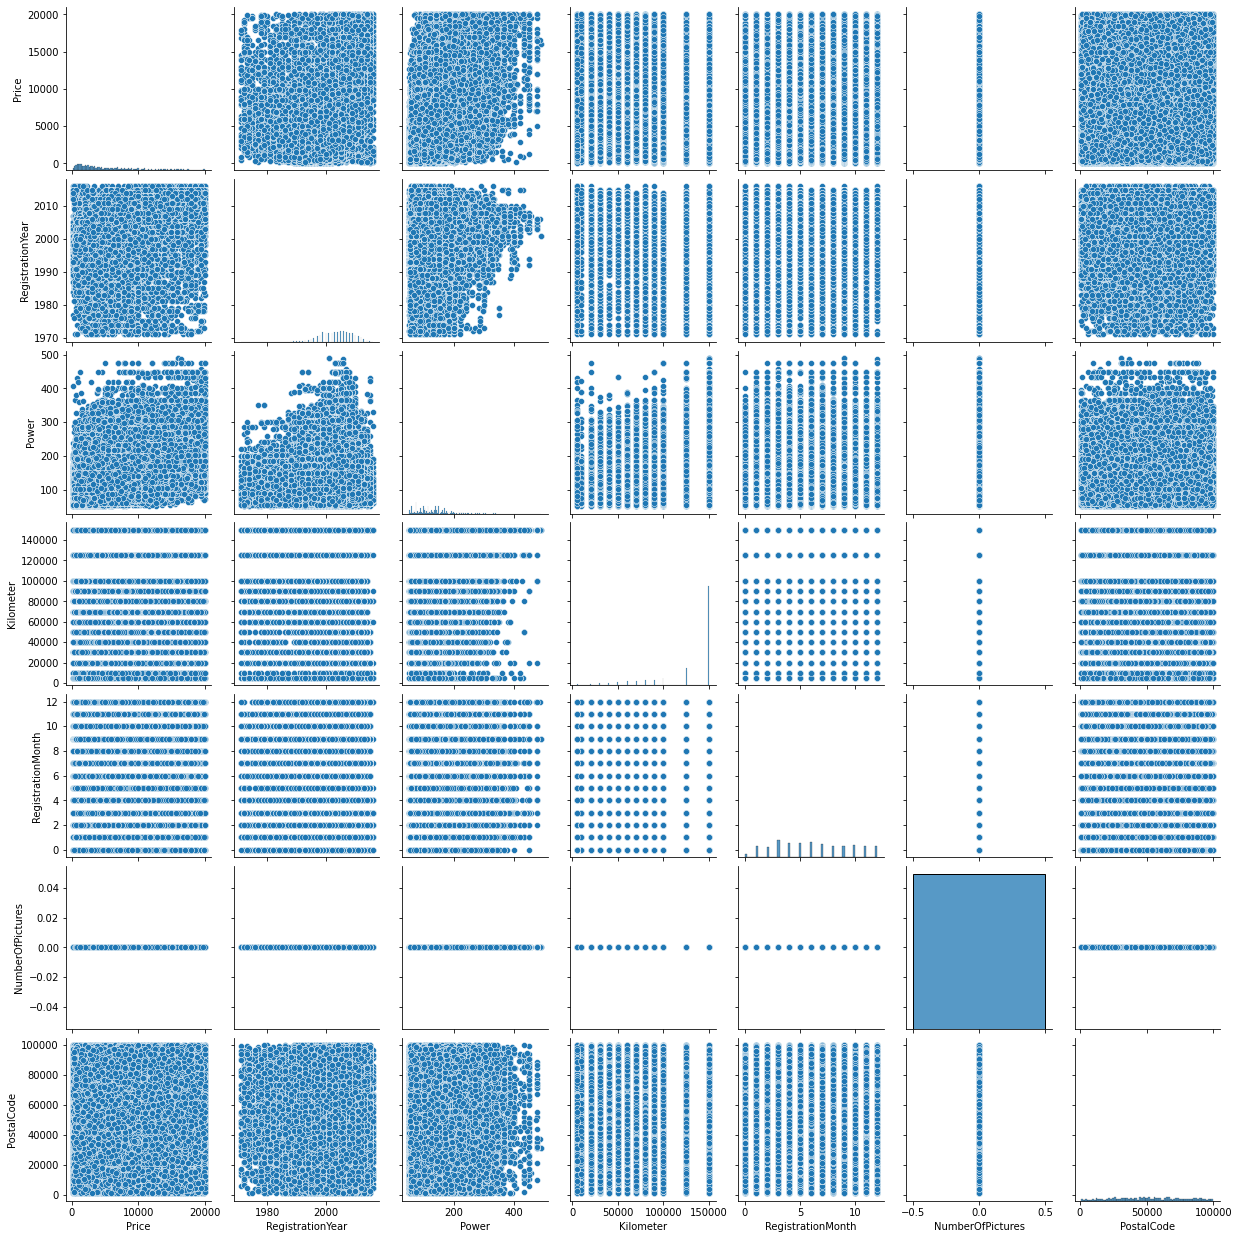

In [18]:
display(df.corr())
sns.pairplot(df);

Цена имеет явные линейные зависимости с годом регистрации, мощностью и пробегом.

## Обучение моделей

### Разделение на выборки
Для начала, определим, какие признаки будут использованы. Если с целевым признаком все понятно - это цена, то для фич нужно проредить таблицу на предмет важных для прогнрозирования признаков.

На цену влияет масса параметров, но вот только не эти:
* дата скачивания анкеты из базы (`DateCrawled`);
* дата создания объявления (`DateCreated`);
* почтовый индекс владельца анкеты (`PostalCode`);
* дата последней активности пользователя(`LastSeen`)
* количество фотографий, которых нет(`NumberOfPictures`).
* месяц регистрации авто(`RegistrationMonth`)

In [19]:
features = df.drop(['DateCrawled', 
                    'DateCreated', 
                    'PostalCode', 
                    'LastSeen', 
                    'NumberOfPictures', 
                    'RegistrationMonth',  
                    'Price'], 
                   axis=1)
target = df.Price
features.shape, target.shape

((226266, 9), (226266,))

Т.к. у нас в планах, помимо градиентного бустинга, использование более простых моделей, закодируем категориальные признаки.

Здесь применим порядковое кодирование, т.к. очень уж много категорий в некоторых признаках, а все модели будут  деревьями. По этой же причине, не требуется масштабирование признаков.

In [21]:
# выделим категориальные признаки в переменную
cat_features = ['VehicleType', 'RegistrationYear', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
for c in cat_features:
    features[c] = features[c].astype('category')

In [22]:
# начнем
encoder = OrdinalEncoder(dtype=int) 

encoder.fit(features[cat_features])
features[cat_features] = encoder.transform(features[cat_features])

features.head()

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
3,5,30,1,75,115,150000,6,36,0
4,5,37,1,69,100,90000,2,31,0
5,4,24,1,102,11,150000,6,2,1
6,1,33,1,109,8,150000,6,25,0
10,4,33,1,105,10,150000,6,19,0


Далее разделим на тренировочную и тестовую выборки

In [23]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.25, 
                                                                            random_state=42)

features_train.shape, target_train.shape, features_test.shape, target_test.shape

((169699, 9), (169699,), (56567, 9), (56567,))

### LightGBM
Построим модель градиентного бустинга, используя LightGBM. 

Начнем с создания тренировочных и тестовых датасетов.

In [24]:
train_data_lgb = lgb.Dataset(features_train, 
                       target_train, 
                       feature_name = features_train.columns.to_list(), 
                       categorical_feature = cat_features)

test_data_lgb = lgb.Dataset(features_test, 
                       target_test, 
                       feature_name = features_test.columns.to_list(), 
                       categorical_feature = cat_features)

Теперь определимся с гиперпараметрами модели.

In [25]:
params_lgb = {'metric': 'rmse', 
              'objective': 'rmse', 
              'random_state': 42, 
              'num_leaves': 80}

Определим количество раундов на кросс-валидации

In [26]:
%%time
cv_data_lgb = lgb.cv(params_lgb,
                     train_data_lgb,
                     num_boost_round=100,
                     categorical_feature=cat_features,
                     nfold=5)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.297955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 135759, number of used features: 9
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.304135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 135759, number of used features: 9
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.311777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of 

Выясним, на каком раунде получен наилучший результат

In [27]:
cv_data_lgb = np.array(cv_data_lgb['rmse-mean'])
print(np.argmin(cv_data_lgb))

99


Оставляем количество раундов, равное 100

In [28]:
%%time
lgb_model = lgb.train(params_lgb, 
                      train_data_lgb, 
                      num_boost_round=100, 
                      categorical_feature=cat_features)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 169699, number of used features: 9
[LightGBM] [Info] Start training from score 5387.392625
CPU times: user 28 s, sys: 386 ms, total: 28.4 s
Wall time: 28.8 s


Посчитаем предсказания и метрику

In [29]:
%%time
predictions = lgb_model.predict(features_test)
print('RMSE:', mean_squared_error(target_test, predictions, squared=False))

RMSE: 1524.0014315735114
CPU times: user 712 ms, sys: 4.75 ms, total: 717 ms
Wall time: 705 ms


Результат для LightGBM: RMSE = 1524, скорость обучения составила 28.8 c, скорость  предсказания 705 мс

### CatBoost
Создаем Pool из подготовленных ранее данных.

In [30]:
train_data_cb = Pool(features_train, 
                       target_train,  
                       cat_features = cat_features)

test_data_cb = Pool(features_test, 
                       target_test,  
                       cat_features = cat_features)

Объявим параметры

In [31]:
params_cb = {'cat_features': cat_features, 
          'eval_metric': 'RMSE', 
          'loss_function': 'RMSE',
              'learning_rate': 0.25,
              'random_seed': 42,
              'verbose':100}

Запустим кросс-валидацию

In [32]:
%%time
cv_data = cv(
    params = params_cb,
    pool = train_data_cb,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    early_stopping_rounds=200)

Training on fold [0/5]

bestTest = 1551.668755
bestIteration = 999

Training on fold [1/5]

bestTest = 1524.713139
bestIteration = 998

Training on fold [2/5]

bestTest = 1535.125413
bestIteration = 999

Training on fold [3/5]

bestTest = 1541.263272
bestIteration = 994

Training on fold [4/5]

bestTest = 1536.554627
bestIteration = 993

CPU times: user 9min 8s, sys: 12.9 s, total: 9min 21s
Wall time: 9min 42s


Познакомимся с лучшей итерацией

In [33]:
cv_data[cv_data['test-RMSE-mean'] == cv_data['test-RMSE-mean'].min()]

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
999,999,1537.913395,9.817055,1401.209449,3.532598


Обучим модель не изменяя параметров. Даже число итераций можно не трогать, т.к. лучшая имеет номер, близкий к дефолтному значению параметра количества итераций.

In [34]:
%%time
model_cb = CatBoostRegressor(**params_cb)
model_cb.fit(train_data_cb)

0:	learn: 3916.6837712	total: 192ms	remaining: 3m 12s
100:	learn: 1627.6177266	total: 13.6s	remaining: 2m 1s
200:	learn: 1562.8320819	total: 26.4s	remaining: 1m 44s
300:	learn: 1527.1583892	total: 39.4s	remaining: 1m 31s
400:	learn: 1500.4419673	total: 52s	remaining: 1m 17s
500:	learn: 1482.1776722	total: 1m 5s	remaining: 1m 5s
600:	learn: 1464.7816327	total: 1m 18s	remaining: 52.2s
700:	learn: 1450.4767601	total: 1m 31s	remaining: 39s
800:	learn: 1438.3248768	total: 1m 45s	remaining: 26.1s
900:	learn: 1426.0635703	total: 1m 58s	remaining: 13s
999:	learn: 1415.4937528	total: 2m 11s	remaining: 0us
CPU times: user 2min 11s, sys: 996 ms, total: 2min 12s
Wall time: 2min 14s


In [35]:
%%time
cb_pred = model_cb.predict(test_data_cb)
print('RMSE:', mean_squared_error(target_test, cb_pred, squared=False))

RMSE: 1533.519730289419
CPU times: user 526 ms, sys: 0 ns, total: 526 ms
Wall time: 550 ms


Как-то не похорошел RMSE при Кэтбусте - 1533.5. Может, если покрутить `learning_rate`, результат улучшится

### RandomForest
Оглянемся назад и применим более простые модели. Начнем и закончим случайным лесом.

In [36]:
%%time
model_rfr = RandomForestRegressor(n_estimators=20, random_state=42) 
parameters = {'max_depth': range(1, 10),
              'min_samples_split': range(2, 10, 2),
              'max_features': ['log2', 'sqrt']}
grid = GridSearchCV(model_rfr, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(features_train, target_train)

CPU times: user 4min 44s, sys: 1.36 s, total: 4min 45s
Wall time: 4min 46s


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=20, random_state=42),
             param_grid={'max_depth': range(1, 10),
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_split': range(2, 10, 2)},
             scoring='neg_root_mean_squared_error')

Обучим с лучшими параметрами

In [37]:
%%time
grid.best_estimator_.fit(features_train, target_train)

CPU times: user 1.52 s, sys: 7.74 ms, total: 1.52 s
Wall time: 1.53 s


RandomForestRegressor(max_depth=9, max_features='log2', n_estimators=20,
                      random_state=42)

Займемся предсказаниями

In [38]:
%%time
rfr_pred = grid.best_estimator_.predict(features_test)
print('RMSE:', mean_squared_error(target_test, rfr_pred, squared=False))

RMSE: 1885.175749836566
CPU times: user 87.1 ms, sys: 0 ns, total: 87.1 ms
Wall time: 91.3 ms


## Анализ моделей

**LightGBM** показал следующие результаты: 
* RMSE = 1524;
* скорость обучения - 29 c;
* скорость предсказания - 705 мс.

**CatBoost** показал следующие результаты: 
* RMSE = 1533.5;
* скорость обучения - 2 мин 14 c;
* скорость предсказания - 550 мс.

**RandomForest** показал следующие результаты: 
* RMSE = 1885.2;
* скорость обучения составила 1.53 c;
* скорость предсказания предсказания 91 мс.

Metric|LightGBM|CatBoost|RandomForest
----|:----:|:----:|:----:
**RMSE**|*1524*|1533.5|1885.2
**Fit Speed**|29 s|2 min 14 s|*1.53 s*
**Predict Speed**|705 ms|550 ms|*91 ms*

Исходя из требований Заказчика, наиболее удачная модель для наших задач - **LightGBM**. 

**LightGBM** имеет адекватную скорость обучения и предсказания, и качество лучше, по сравнению с недонастроенной **CatBoost**, которая обучилась еще и в 6 раз медленнее. Самая быстрая модель - **RandomForest** показала наихудший результат.